<a href="https://colab.research.google.com/github/sarahajbane/notebooks/blob/main/sklearn_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source Information


Original Data Source from Trevor Hastie's LARS software page via Standford University Department of Statistics:
[Diabetes Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt)

**Brief Description**

From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) [*Least Angle Regression*](https://https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf), Annals of Statistics (with discussion), 407-499, we have:

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients and quantitative measure of disease progression one year after baseline"

The included variables are:
* age: Age of the patient
* sex: Sex of the patient
* bmi: Body mass index
* bp: Blood pressure
* s1: Total serum cholesterol (tc)
* s2: Low-density lipoproteins (ldl)
* s3: High-density lipoproteins (hdl)
* s4: tc / hdl (tch)
* s5: Log of serum triglycerides level (ltg)
* s6: Blood sugar level (glu)
* target: measure of disease progression one year after baseline


# EDA for assessment

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_diabetes(as_frame=True, scaled= False) # instructed to set scaled parameter to False
df = data.frame
df.info() # shows columns, counts, non-nulls and types
# alt check null vales:
# print(df.isnull().sum())
# print(df.duplicated().sum()) # check duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [3]:
#df.describe()
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [5]:
print(df['age'].describe())
print(df['age'].nunique())

count    442.000000
mean      48.518100
std       13.109028
min       19.000000
25%       38.250000
50%       50.000000
75%       59.000000
max       79.000000
Name: age, dtype: float64
58
0    53.0
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Density'>

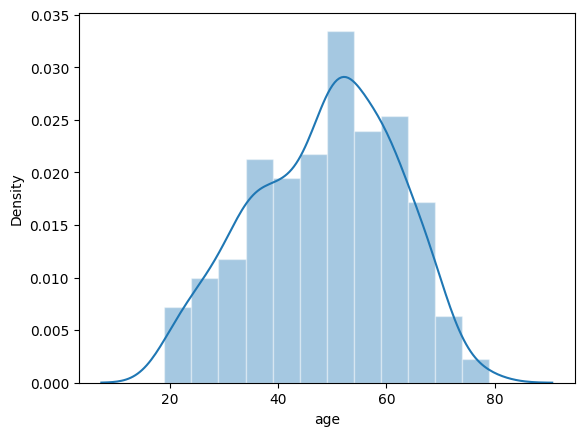

In [9]:
# Visualise distribution of ages

#sns.distplot(df['age']) # depracating soon
#alt:
sns.histplot(df['age'], kde = True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) # alt for same output as distplot deprecated

In [10]:
df.sex.unique()

array([2., 1.])

In [11]:
conditions = [
    (df['sex'] == 2),
    (df['sex'] == 1)
]
choices = ['M', 'F']
df['sex'] = np.select(conditions, choices, default='Unknown')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,M,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,F,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,M,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,F,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,F,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


<Axes: xlabel='bp', ylabel='Count'>

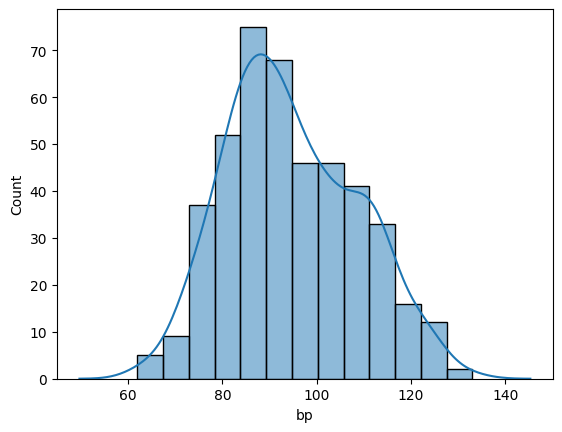

In [16]:
# Histogram of BMI
sns.histplot(df['bp'],kde = True, kde_kws=dict(cut=3))

# matplotlib lternative:
#plt.hist(df['bmi'], bins=30, color='skyblue', edgecolor='black')
#plt.title('BMI Distribution')
#plt.xlabel('BMI')
#plt.ylabel('Frequency')

In [ ]:
print(df['bp'].describe())
print('median:', df['bp'].median())

In [ ]:
#print(df.info())

# Additional (non-assessed plots)

In [ ]:
sns.boxplot(data=df, x='sex', y='age')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [ ]:
# Histogram of Age
#plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
#plt.title('Age Distribution')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.show()


In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['bmi'], df['s6'])

# Scatter plot of BMI vs. Glucose Level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='s6', alpha=0.7)
plt.title('BMI vs. Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')

# Add regression line
sns.regplot(x='bmi', y='s6', data=df, scatter=False, color='red', label='Regression Line')

# Get plot limits to position annotation dynamically
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Annotate with the equation and R^2 value
plt.annotate(
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$",
    xy=(5,8), xycoords='data',  # 5% from left, 10% from top
)

# Show the plot
plt.show()


In [ ]:
# Pairplot of selected features
sns.pairplot(df[['age', 'bmi', 'bp', 's6', 'sex']], hue='sex')
plt.suptitle('Pairplot of Age, BMI, BP, Glucose Level, and Sex', y=1.0)
plt.show()
